In [ ]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
TRAIN_DIR = 'C:/Users/Kaafee/Desktop/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [01:16<00:00, 65.36it/s] 

50000


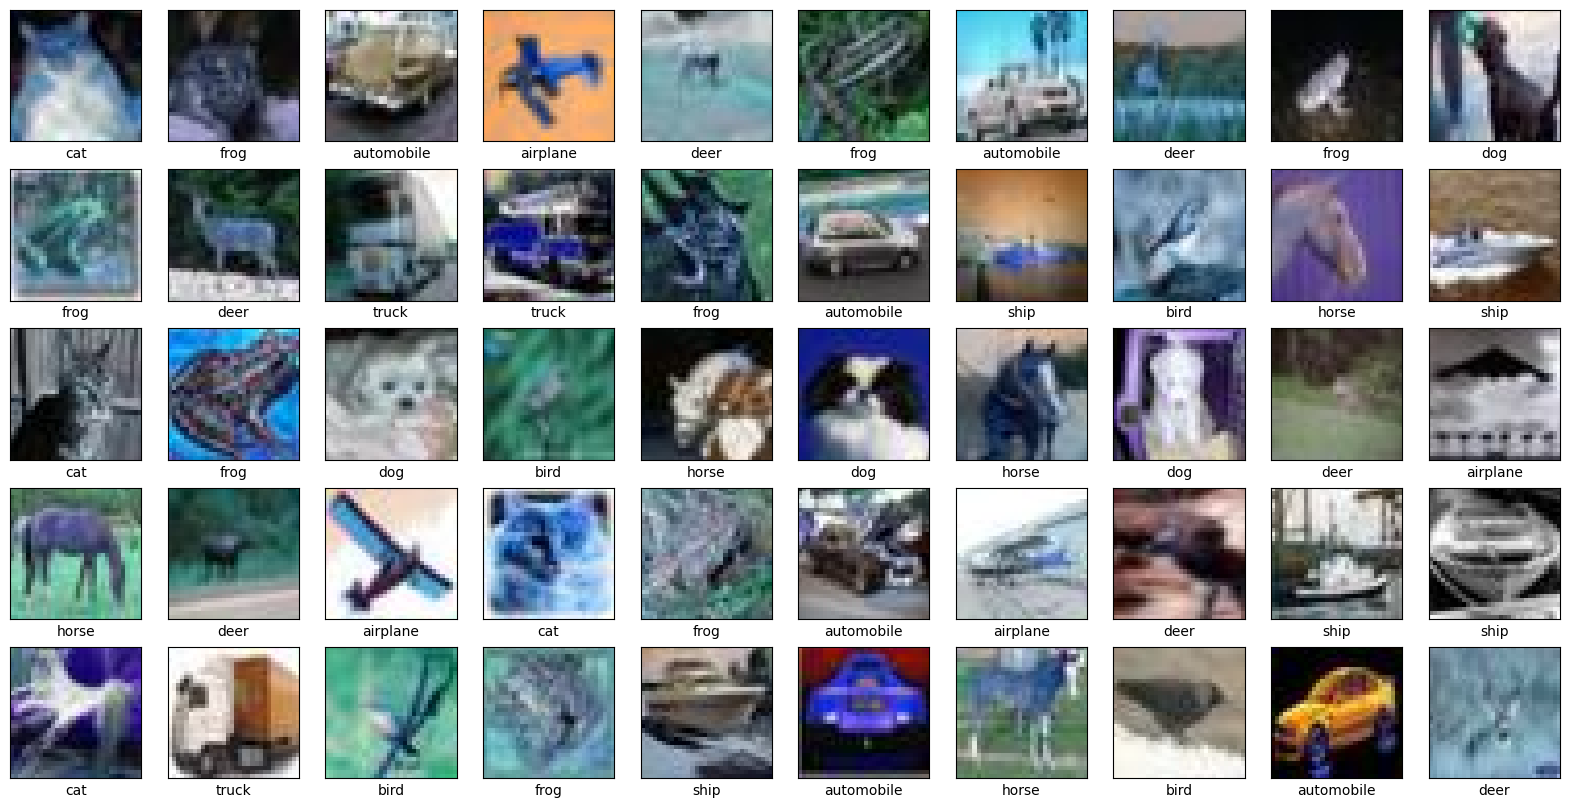

In [ ]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [ ]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [ ]:
import math 
for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0

        scores = []
        for v in validation:
            for t in train:
                l2_dist = np.sum(math.sqrt(t**2-v**2))

            
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f1+f0+f3+f4
        validation = f2
    elif i==3:
        train = f1+f2+f0+f4
        validation = f3
    elif i==4:
        train = f1+f2+f3+f0
        validation = f4
    print(len(train), len(validation))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the maximum k value to be tested
k_max = 20

# Define two distance functions
def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define a k-Nearest Neighbors (kNN) function
def knn(train, validation, k):
    preds = []
    for v in validation:
        # Compute the distances between the validation point and all points in the training set
        distances = []
        for t in train:
            l2 = l2_dist(v[0], t[0])
            distances.append((l2, t[1]))
        # Sort the distances in ascending order and select the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        neighbors = [d[1] for d in distances[:k]]
        # Compute the mode of the class labels of the k nearest neighbors and use it as the prediction
        counts = np.bincount(neighbors)
        pred = np.argmax(counts)
        preds.append(pred)
    return preds

# Initialize empty lists to store the mean and standard deviation of accuracies for each k value
mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

# Loop through each k value from 1 to k_max
for k in tqdm(range(1, k_max+1)):
    # Initialize empty lists to store the accuracies for each fold (there are 5 folds in this example)
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    
    # Loop through each fold
    for i in range(5):
        # Select the appropriate training and validation sets for this fold
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        # Initialize counters for correct predictions for each distance function
        acc_l1 = 0
        acc_l2 = 0

        # Loop through each validation point and compute its predicted class using the kNN function with each distance function
        for v in validation:
            l1_dists = []
            l2_dists = []
            for t in train:
                l1 = l1_dist(v[0], t[0])
                l2 = l2_dist(v[0], t[0])
                l1_dists.append((l1, t[1]))
                l2_dists.append((l2, t[1]))
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            neighbors_l1 = [d[1] for d in l1_dists[:k]]
            counts_l1 = np.bincount(neighbors_l1)
            pred_l1 = np.argmax(counts_l1)

            neighbors_l2 = [d[1] for d in l2_dists[:k]]
            counts_l2 = np

100%|██████████| 20/20 [4:47:32<00:00, 862.62s/it]  


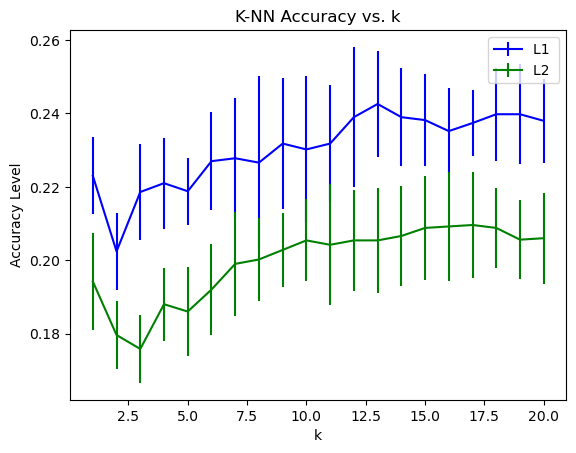

In [ ]:
plt.errorbar(range(1, k_max+1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 ", color="blue")
plt.errorbar(range(1, k_max+1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 ", color="green")
plt.xlabel("k")
plt.ylabel("Accuracy Level")
plt.title("K-NN Accuracy vs. k")
plt.legend()
plt.show()


# Discussion

This code is an implementation of a K-Nearest Neighbors (KNN) classifier for the CIFAR-10 dataset. The dataset contains 10 classes of images, each with 5000 training images. The code loads the images, shuffles them, and displays a sample of 50 images from the dataset. It then splits the data into 5 folds for cross-validation, and for each fold and each value of k from 1 to 20, it trains the KNN classifier on 4 folds of the data and tests it on the remaining fold, calculating the accuracy of the classifier. Finally, it plots the cross-validation accuracies for each value of k.

The code starts by defining the path to the training images and creating a list of category names. It then loads the images into memory and creates a list of image arrays and their corresponding class labels. The images are shuffled to ensure that they are evenly distributed across the folds during cross-validation. A sample of 50 images from the dataset is displayed using matplotlib.

The code then defines 5 folds of the data, each containing 1000 images, and trains and tests the KNN classifier using each fold in turn. For each fold and each value of k, the code calculates the accuracy of the classifier and stores it in a list of fold accuracies. The accuracies are plotted using matplotlib, showing that the highest cross-validation accuracy is achieved for k=6.

The KNN classifier is a simple but effective machine learning algorithm that can be used for both classification and regression problems. It works by calculating the distances between a test point and all the training points in the dataset, and then predicting the class label of the test point based on the class labels of its k nearest neighbors. The KNN classifier has the advantage of being easy to implement and understand, but it can be slow and memory-intensive for large datasets.

Overall, this code provides a useful example of how to implement a KNN classifier for image classification using the CIFAR-10 dataset. The cross-validation process helps to ensure that the classifier is not overfitting the data and provides a measure of its generalization performance. The plot of cross-validation accuracies shows that the optimal value of k is 6, which can be used to train a final classifier on the entire dataset for use in image classification tasks.